## Assignment 3
### Tiffany Tang
### NetID: tt2405

1)  Plot the distribution of heights in the group.
     Is the distribution Gaussian ? Yes or no.

    Issues to be considered, plotting just the values for each person will not
    be useful since no two people will have exactly the same height/weight, so
    you have to bin the heights somehow.

    Easiest is to round the numbers to
    the closest integer (using round(x,0) or else as.integer()), and then using
    the table function on the list and then plotting the values.
    
    Another approach is to use the hist() function to plot the histogram.

    A third approach would be to use the density function.

    A final approach is to using binning and then plot that data.

In [2]:
library(ggplot2) #import plotting library

wh <- read.csv("weight-height.csv", header = TRUE) #import in the data file
head(wh) #just to take a look and see the file

Gender Height   Weight  
1 Male   73.84702 241.8936
2 Male   68.78190 162.3105
3 Male   74.11011 212.7409
4 Male   71.73098 220.0425
5 Male   69.88180 206.3498
6 Male   67.25302 152.2122

**My thoughts**:

Since plotting the heigts for each person will not be useful, I will round the heights to the nearest integer and plot that way. I will plot using a barplot

In [3]:
heights_rounded <- round(wh$Height, 0) #round the heights to the nearest integer
heights_table <- table(heights_rounded) #make the list a table
head(heights_table) #take a look at our table

heights_rounded
 54  55  56  57  58  59 
  1   4  13  41  77 158 

png 
  2

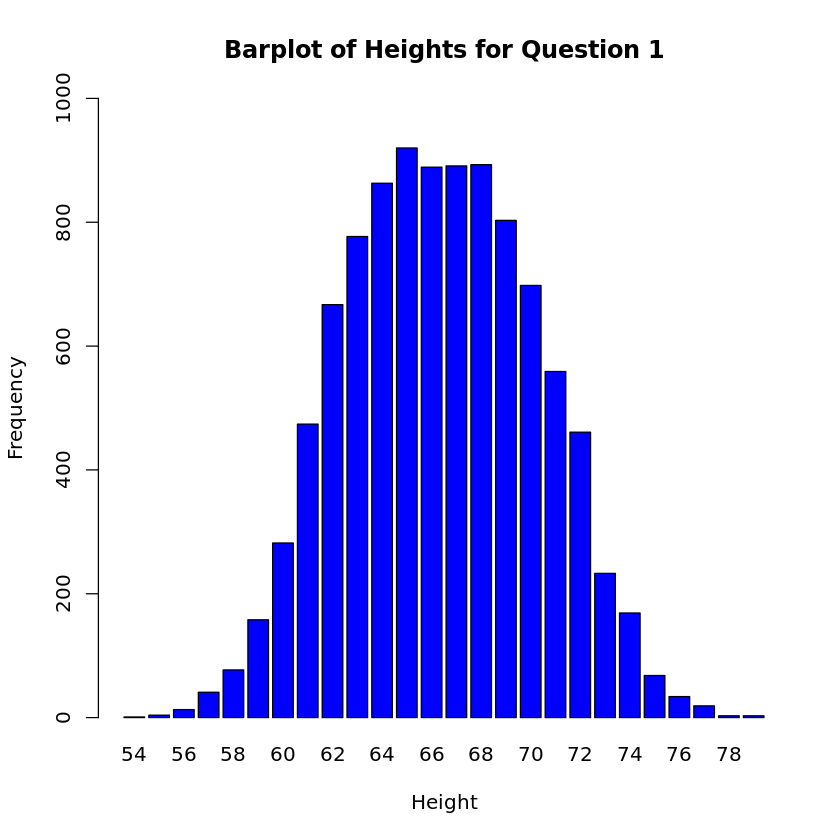

In [4]:
barplot(heights_table, main = "Barplot of Heights for Question 1", #what table we are plotting and plot title
        xlab = "Height", #X axis label
        ylab = "Frequency", #Y axis label
        col = "blue", #color is blue
        beside = TRUE ,#I want the bars to be next to each other
        ylim = c(0, 1000))#upper limit of y axis set to 1000
#plot code

jpeg("question1_heights.jpg")#code to save
dev.off()

**If the distribution is not Gaussian, what can you guess from the shape
      in terms of underlying subgroups ?**

At first glance, the distribution might appear Gaussian due to its bell-shaped form, but the peak is flatter than expected for a classic Gaussian curve. Upon closer inspection, there are actually two peaks: one around 64 inches and another around 70 inches. This makes the distribution bimodal, indicating the presence of two subgroups within the data.

Given that the data represents the heights of men and women, it's reasonable to assume that one peak corresponds to the average height of females, and the other peak represents the average height of males. The fact that there isn't a large dip between the two peaks suggests that the average heights of men and women are fairly close to one another, leading to some overlap between the distributions.

4) Plot the distribution of heights of men in black and women in red on the
     same graph  and for the whole group (in blue)

    Hint: use plot and line commands and the xlim and ylim values to make
    appropriate graphs (you have to bin the data)

    Are the “Male” and “Female” distributions gaussian ?
    The total is the sum of Male and Female distributions.
    Do you see why it is not Gaussian ?

**The notes didn't cover how to bin the data so I looked this up on my own**

I used summary to find the minimum height and the maximum height and used this for my bins

In [5]:
summary(heights_rounded)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.00   64.00   66.00   66.37   69.00   79.00 

In [6]:
#min is 54, max is 79

bins<- seq(54, 79, by = 1) #define my bins based on the summary of the heights

In [7]:
wh_males <- wh[wh$Gender == "Male", ]#this creates a dataframe of just males
wh_females <- wh[wh$Gender == "Female", ]#this creates a dataframe of just males

I need to first put the information into the hist function
- one for males
- one for females
- one for all

The breaks are going to be out bins, and plot is set to false because we aren't plotting yet

In [8]:
#histogram information
histo_males <- hist(wh_males$Height, breaks = bins, plot = FALSE) #false because we dont want to plot, just put this in a variable
histo_females <- hist(wh_females$Height, breaks = bins, plot = FALSE) #repeat for females
histo_all <- hist(wh$Height, breaks= bins, plot = FALSE)

In [9]:
head(histo_all) #just to see what this looks like

$breaks
 [1] 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
[26] 79

$counts
 [1]   3   7  27  54 118 204 405 550 732 842 868 890 886 916 844 776 623 526 330
[20] 203 111  47  26   7   5

$density
 [1] 0.0003 0.0007 0.0027 0.0054 0.0118 0.0204 0.0405 0.0550 0.0732 0.0842
[11] 0.0868 0.0890 0.0886 0.0916 0.0844 0.0776 0.0623 0.0526 0.0330 0.0203
[21] 0.0111 0.0047 0.0026 0.0007 0.0005

$mids
 [1] 54.5 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5
[16] 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5

$xname
[1] "wh$Height"

$equidist
[1] TRUE

We want to plot a line graph of the histgrams, so we use the mid point of our bins as the line
- there is a column in histo that is mids, with the midpoint of each bin
- there is also an attribute called density that is the percentage of each bin- the total of density will be one. It is not the raw frequency, but they're proportional
- density is good for comparing samples of different sizes

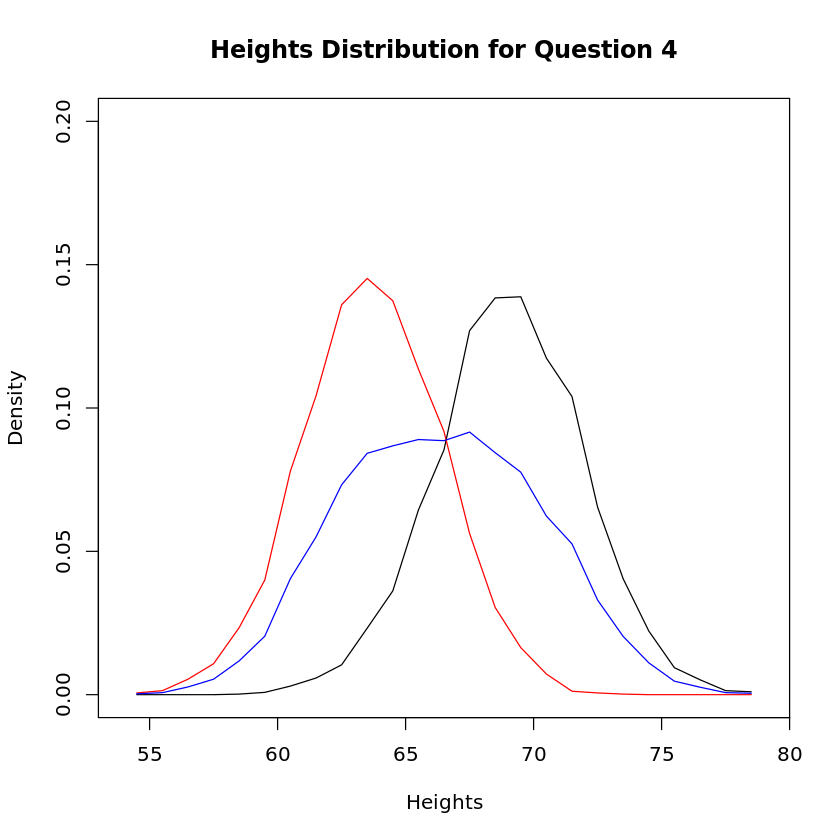

In [10]:
#time to actually plot it, we only want the lines of this
plot(histo_all$mids, histo_all$density, type = "n", 
     xlab = "Heights", 
     ylab = "Density", 
     xlim = range(bins), 
     ylim = c(0, 0.2), #played with the limits to see what looks best
     main = "Heights Distribution for Question 4")

#Now we have to add the lines for mens
lines(histo_males$mids, histo_males$density, col = "black", lwd = 1)
lines(histo_females$mids, histo_females$density, col = "red", lwd = 1) #females
lines(histo_all$mids, histo_all$density, col = "blue", lwd = 1) #all

**Are the “Male” and “Female” distributions gaussian ? The total is the sum of Male and Female distributions. Do you see why it is not Gaussian ?**

The male and female distributions appear to be gaussian. They both look to be bell shaped and symmetrial, although with how I made the bins for the data the tail on the right side of the female and left side of the male appear longer- making the bell-curve appear assymmetric.

The total of the male and female is actually not gaussian and is bimodal. This graph shows that the male and the female peaks have two distinct points, which results in a non-gaussian combined graph.

### Repeat with weight

In the same manner as I did with the heights, I will round the weights to the nearest integer then put it in a table to do a plot.

In [12]:
weights_table <- table(round(wh$Weight, 0)) #combined the rounding function and table function step into one

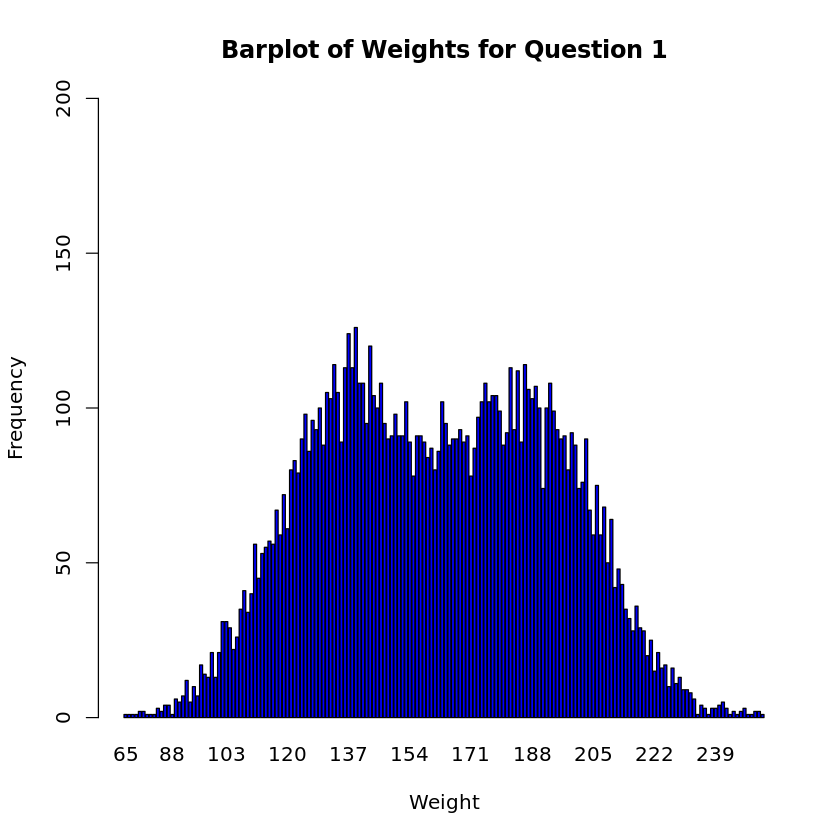

In [14]:
#use the same barplot code for the weights
barplot(weights_table, main = "Barplot of Weights for Question 1", #what table we are plotting and plot title
        xlab = "Weight", #X axis label
        ylab = "Frequency", #Y axis label
        col = "blue", #color is blue
        beside = TRUE ,#I want the| bars to be next to each other
        ylim = c(0, 200))#upper limit of y axis set to 1000

**If the distribution is not Gaussian, what can you guess from the shape
      in terms of underlying subgroups ?**
      
In the weights graph you can very obviously tell that the graph is not Gaussian and is bimodal with two obvious peaks.

Similarly with the heights, this suggests that the males have an average that is different from the females average. Infact you can tell in this gaph that the female average is around 137 and te male average is around 188, with some overlap in the middle. 

**Plot the distribution of heights of men in black and women in red on the
     same graph  and for the whole group (in blue)**

    Hint: use plot and line commands and the xlim and ylim values to make
    appropriate graphs (you have to bin the data)

**Are the “Male” and “Female” distributions gaussian ?
The total is the sum of Male and Female distributions.
Do you see why it is not Gaussian ?**

I will use the same methods as I did for the heights when plotting the weights. 
- first put histogram information for each: male, female all
- plot the line graphs onto the same graph

In [16]:
summary(wh$Weight) #get info for our bins

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   64.7   135.8   161.2   161.4   187.2   270.0 

In [17]:
Wbins <-seq(64, 270, by = 1)
#histogram information
Whisto_males <- hist(wh_males$Weight, breaks = Wbins, plot = FALSE) #false because we dont want to plot, just put this in a variable
Whisto_females <- hist(wh_females$Weight, breaks = Wbins, plot = FALSE) #repeat for females
Whisto_all <- hist(wh$Weight, breaks= Wbins, plot = FALSE)

In [21]:
#put it all on a plot
#use the same density and mids attribute like with the height
plot(Whisto_all$mids, Whisto_all$density, type = "n", 
     xlab = "Weights", 
     ylab = "Density", 
     xlim = range(Wbins), 
     ylim = c(0, 0.03), #played with the limits to see what looks best
     main = "Weights Distribution for Question 4")

#Now we have to add the lines for mens
lines(Whisto_males$mids, Whisto_males$density, col = "black", lwd = 1)
lines(Whisto_females$mids, Whisto_females$density, col = "red", lwd = 1) #females
lines(Whisto_all$mids, Whisto_all$density, col = "blue", lwd = 1) #all

Similar to the heights graph, the male and female distributions appear approximately gaussian, with clear peaks and a bell curve shape. Both graphs are fairly symmetrical around their peaks, although there is some elongation in the tails, likely due to how I managed the binning (in the same manner in which I described for the heights graph).

The combined distribution is clearly not Gaussian. You can see that the two peaks in the combined graph align with the individual peaks from the male-only and female-only distributions, confirming the presence of two distinct subgroups.

## Correlations

6. plot height (x-axis) versus weight (y-axis) for the group
    (each point is a person on this graph)

In [29]:
#I am going to use ggplot to make my scatter plot
ggplot(wh, aes(x = Height, y= Weight)) + #x is height, y is weight and I am making the color based on gender
    geom_point(color = "Blue") +
    labs(title = "Height vs Weight",
       x = "Height",
       y = "Weight")

 7. plot height versus weight, on the same plot,
   separately for men (in black) and women (red)

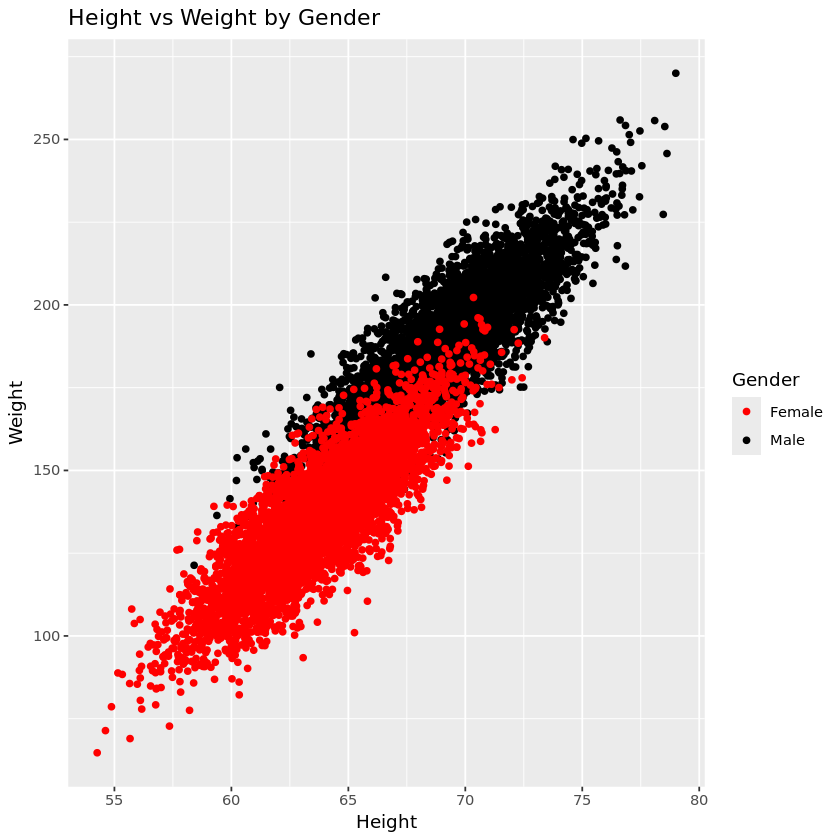

In [26]:
#Similar to above I am using ggplot
ggplot(wh, aes(x = Height, y= Weight, color = Gender)) + #x is height, y is weight and I am making the color based on gender
    geom_point() +
    scale_color_manual(values = c("Male" = "black", "Female" = "red")) +
    labs(title = "Height vs Weight by Gender",
       x = "Height",
       y = "Weight")

**8) Discuss the following ,**

   **a) is height a good proxy for weight ?**

Based on the graph, height seems to be a reasonable proxy for weight, as there is a clear positive correlation between the two variables. In general, as height increases, weight also tends to increase for both men and women. However, there is some spread in the data, meaning height alone cannot perfectly predict weight. Other factors such as body composition and lifestyle likely contribute to this variation.

 **b) Is the rate of increase in weight with height higher for men or for women ?**

 The rate of increase can be found by getting the lines of best fit for the males and females, and then comparing the slopes for each of the line. The greater the slope- the greater the rate of increase.


In [32]:
#I am adding lines of best fit to the male and female distribution to see if there is a difference
 ggplot(wh, aes(x = Height, y = Weight, color = Gender)) + 
    geom_point() +
    geom_smooth(method = "lm", aes(group = Gender), color = "green", se = FALSE) +  # Adding separate best fit lines for each gender
    #se set to false so there is no interval shading
    scale_color_manual(values = c("Male" = "black", "Female" = "red")) +
    labs(title = "Height vs Weight by Gender with Lines of best fit",
       x = "Height",
       y = "Weight")

`geom_smooth()` using formula = 'y ~ x'


In [33]:
#its hard to tell visually if the slope for Female is greater than male, 
#I will manually find the slopes of the line
#use lm function to find the line of best fit, lm for linear model
lm_male <- lm(Weight ~ Height, data = wh[wh$Gender == "Male", ])
lm_female <- lm(Weight ~ Height, data = wh[wh$Gender == "Female", ])

# Print the summary of the models to get the equations
summary(lm_male)
summary(lm_female)


Call:
lm(formula = Weight ~ Height, data = wh[wh$Gender == "Male", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-33.023  -6.816  -0.149   6.777  35.813 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -224.49884    3.41085  -65.82   <2e-16 ***
Height         5.96177    0.04937  120.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.995 on 4998 degrees of freedom
Multiple R-squared:  0.7447,	Adjusted R-squared:  0.7447 
F-statistic: 1.458e+04 on 1 and 4998 DF,  p-value: < 2.2e-16



Call:
lm(formula = Weight ~ Height, data = wh[wh$Gender == "Female", 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-44.194  -6.783  -0.069   6.837  33.026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -246.01327    3.35616   -73.3   <2e-16 ***
Height         5.99405    0.05263   113.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.03 on 4998 degrees of freedom
Multiple R-squared:  0.7218,	Adjusted R-squared:  0.7218 
F-statistic: 1.297e+04 on 1 and 4998 DF,  p-value: < 2.2e-16


*I had to look up using the lm function in R and what the summary of that means*

The coefficient next to `Height` tells us what the slope is (for every inch of height gained, how many pounds are gained). We can see for the males that it is  5.96, and for the females it is 5.99. Which means that the rate of increase in weight with height is slightly greater in females than males. 

   **c) Based on these plots and values for standard deviations and means, for which group (men versus women) is the height a better proxy for weight ?**

From the summary of the lines of best fit we get the R squared value. R squared will tell us how well the height explains the variability in weight. A higher R-squared value indicates a stronger relationship between height and weight.
- Men: R squared is 0.7447 or 74.47%
- Women: R squared is 0.7218 of 72.18%

Since the R squared value is higher for men than women that means height is a better proxy for weight in men moreso than women.

  **d) Would binning the data on height and weight and using a 3-d plot give a better picture ?**
  
Binning the data on height and weight and visualizing it in a 3D plot (for example, with height, weight, and density as dimensions) could provide additional insights. It would help show how densely distributed the data points are across different height and weight ranges, allowing us to better observe clustering patterns and potential outliers. But since we are already plotting each individual on the graph- we can clearly see where on the graph it is densest. The current 2D plot already shows a clear relationship between height and weight and adding a third dimension would't offer more significant information that isn't already present in the graph. 

**9) Use the dataset called iris.**

   **a) Describe the data through two interesting plots.**

In [34]:
head(iris) #just to take a look

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

I am going to make two plots
- One will be a correlation plot: Sepal length x width and species will be color coded
- One will be petal length (histogram)

In [38]:
#plot for my first one
#Made in the same manner as the height and weight correlation
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
    geom_point(size = 3) +
    scale_color_manual(values = c("setosa" = "purple", "versicolor" = "orange", "virginica" = "green")) +
    labs(title = "Sepal Length vs Sepal Width by Species",
       x = "Sepal Length",
       y = "Sepal Width")

In [63]:
#I am going to use geom_histogram to get a histogram of the petal lengths

# Histogram of Petal Length for each species, grouped by species in same plot
ggplot(iris, aes(x = Petal.Length, fill = Species)) +
  geom_histogram(alpha = 0.4, bins = 50) + #alpha adjusts opacity
  scale_fill_manual(values = c("setosa" = "purple", "versicolor" = "orange", "virginica" = "green")) +
  labs(title = "Petal Length Distribution by Species", #labels
       x = "Petal Length",
       y = "Count")

   **b) Use the reshape2 package to show multiple panels in one plot**

In [43]:
library(reshape2) #import library

iris_melt = melt(iris, id = "Species") #keep the species, make the variables into long format
head(iris_melt)# just to see

Species variable     value
1 setosa  Sepal.Length 5.1  
2 setosa  Sepal.Length 4.9  
3 setosa  Sepal.Length 4.7  
4 setosa  Sepal.Length 4.6  
5 setosa  Sepal.Length 5.0  
6 setosa  Sepal.Length 5.4

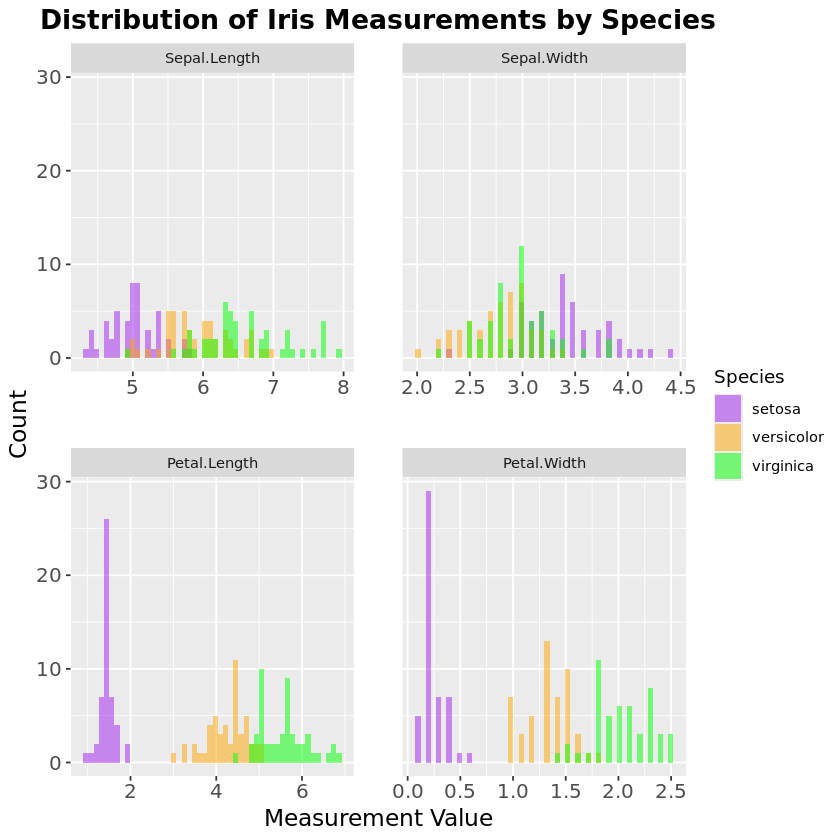

In [61]:
#I will be making histograms with the melted iris data

ggplot(data = iris_melt, aes(x = value, fill = Species)) + #x axis will be the value of each variable, fill color of my histograms based on species
  geom_histogram(alpha = 0.5, bins = 50, position = "identity") +  # Use identity to overlap
  scale_fill_manual(values = c("setosa" = "purple", "versicolor" = "orange", "virginica" = "green")) + #to adujust color 
  labs(title = "Distribution of Iris Measurements by Species", #Title
       x = "Measurement Value",
       y = "Count") +
  facet_wrap(~ variable, scales = "free_x") + # Create separate panels for each measurement
#below code customizes my theme and look of the plots
  theme(panel.spacing = unit(2, "lines"),  # Increase spacing between panels
        axis.text = element_text(size = 12),  # Adjust axis text size
        axis.title = element_text(size = 14),  # Adjust axis title size
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5))  # Center title and adjust size